In [1]:
%pylab inline
from tqdm import tqdm_notebook

Populating the interactive namespace from numpy and matplotlib


# Assignment 2

## Question 1: Genetic Drift without Mutation

Take a population of N=500 individuals half of which consist of type 0 and the remaining half of type 1, 
initially. Assume that the fitness of both types are equal and neither type can mutate to the other.

1. Write a program to obtain the time-evolution of the frequencies of the two types in the population when individuals making up the population in the next generation are chosen randomly from members of the current generation following Moran process. **Run the simulation for as long as it takes for any one of the two types to get fixed in the population.**

2. **Obtaining the Fixation Probability**: Repeat the above simulation for Nt=100 trials and find out the fraction of times each of the two types 0 and 1 get fixed ? What do you expect the theoretical value of fixation probability for either sub-type to be ? 

**For any one trial, plot the evolution of frequency of type 0 and type 1 with time.**



192002

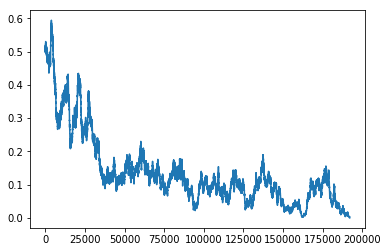

In [3]:
from numpy.random import randint
import matplotlib.pyplot as plt

N=500
population  =[ 0 if i< N/2 else 1 for i in range(N)]

def neutral_drift_moran_process(population):
    history = []
    while True:
        history.append(sum(population)/N)
        if sum(population) in {N,0}:
            break
        else:
            reproduce,replace = randint(0,N,size=2)
            population[replace] = population[reproduce]
    return history

evol = neutral_drift_moran_process(population)
plot(evol)
len(evol)

## Moran Process with constant selection but without mutation

20364

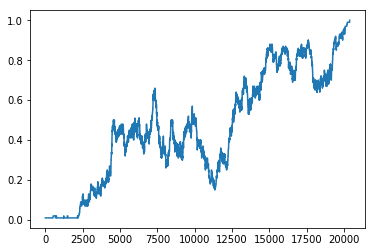

In [50]:
from numpy.random import random


fitness_A = 1.01 # 0
fitness_B = 1    # 1

norm_fit_A = fitness_A/(fitness_A+fitness_B)
norm_fit_B = fitness_B/(fitness_A+fitness_B)

N=100
population  =[ 'A' if i< 1 else 'B' for i in range(N)]

def fitness(member):
    return norm_fit_A if member=='A' else norm_fit_B


def advantageous_mutant_invasion(population):
    history = []
    while True:
        history.append(population.count('A')/N)
        if population.count('A') in {0,N}:
            break
        else:            
            reproduce,replace = randint(0,N,size=2)
            if random() < fitness(population[reproduce]):
                population[replace] = population[reproduce] 
    return history

evol = advantageous_mutant_invasion(population)
plot(evol)
len(evol)

## Random drift with constant selection

48058

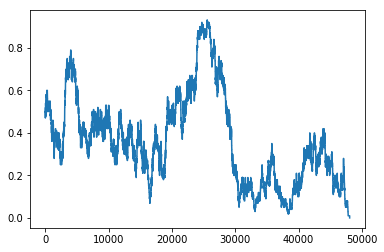

In [51]:
from numpy.random import random, randint

fitness_A = 0.99 # 0
fitness_B = 1    # 1

norm_fit_A = fitness_A/(fitness_A+fitness_B)
norm_fit_B = fitness_B/(fitness_A+fitness_B)

N=100
population  =[ 'A' if i< N//2 else 'B' for i in range(N)]

def fitness(member):
    return norm_fit_A if member=='A' else norm_fit_B


def disadvantageous_mutant_invasion(population):
    history = []
    while True:
        history.append(population.count('A')/N)
        if population.count('A') in {0,N}:
            break
        else:            
            reproduce,replace = randint(0,N,size=2)
            if random() < fitness(population[reproduce]):
                population[replace] = population[reproduce] 
    return history

evol = disadvantageous_mutant_invasion(population)
plot(evol)
len(evol)